# Artificial Neural Network for Apt Pricing Prediction

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error

In [111]:
df = pd.read_csv("data/data_scaled.csv")
df.head()

,scaled_y,y,scaled_x1,scaled_x2,scaled_x3,scaled_x4,x_2_dumm,x_3_dumm,x_4_dumm,x1
0,-0.053227,139.0000,-0.143087,-0.087855,-0.096478,-0.089952,0,0,0,58.00
1,-0.034211,233.2596,-0.119559,-0.087855,-0.096478,-0.089952,0,0,0,79.34
2,-0.052016,145.0000,-0.105601,-0.087855,-0.096478,-0.089952,0,0,0,92.00
3,-0.057463,118.0000,-0.134267,-0.087855,-0.096478,-0.089952,0,0,0,66.00
4,-0.056051,125.0000,-0.128754,-0.087855,-0.096478,-0.089952,0,0,0,71.00


In [112]:
y = df['scaled_y']
X = df.drop(columns=['y', 'x_2_dumm', 'x_3_dumm', 'x_4_dumm', 'x1', 'scaled_y'])

In [113]:
# y = df['scaled_y']
# X = df.drop(columns=['y', 'scaled_x2', 'scaled_x3', 'scaled_x4', 'x1', 'scaled_y'])

In [114]:
X_train, X_test_cross, y_train, y_test_cross = train_test_split(X, y, test_size=0.4, random_state=101)

In [115]:
X_test, X_cross, y_test, y_cross = train_test_split(X_test_cross, y_test_cross, test_size=0.5,random_state=100)

In [103]:
# !pip install tensorflow

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.activations import relu,linear

In [18]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [116]:
hidden_units1 = 4
hidden_units2 = 6
hidden_units3 = 2
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [117]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    X_train.values, 
    y_train.values, 
    epochs=5, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
71/71 [==============================] - 2s 7ms/step - loss: 0.0023 - mean_squared_logarithmic_error: 0.0023 - val_loss: 9.8784e-04 - val_mean_squared_logarithmic_error: 9.7832e-04
Epoch 2/5
71/71 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_logarithmic_error: 0.0014 - val_loss: 7.7217e-04 - val_mean_squared_logarithmic_error: 7.6281e-04
Epoch 3/5
71/71 [==============================] - 0s 5ms/step - loss: 0.0014 - mean_squared_logarithmic_error: 0.0014 - val_loss: 6.5904e-04 - val_mean_squared_logarithmic_error: 6.4839e-04
Epoch 4/5
71/71 [==============================] - 0s 4ms/step - loss: 0.0013 - mean_squared_logarithmic_error: 0.0013 - val_loss: 6.6414e-04 - val_mean_squared_logarithmic_error: 6.5347e-04
Epoch 5/5
71/71 [==============================] - 0s 3ms/step - loss: 0.0013 - mean_squared_logarithmic_error: 0.0013 - val_loss: 7.7690e-04 - val_mean_squared_logarithmic_error: 7.6421e-04


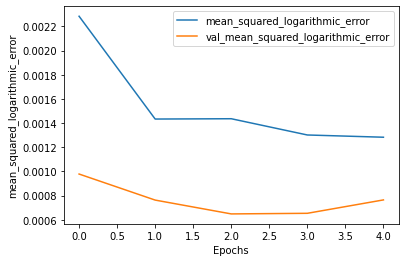

In [118]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [119]:
# BEGIN UNIT TEST
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 4)                 20        
                                                                 
 dropout_20 (Dropout)        (None, 4)                 0         
                                                                 
 dense_42 (Dense)            (None, 6)                 30        
                                                                 
 dropout_21 (Dropout)        (None, 6)                 0         
                                                                 
 dense_43 (Dense)            (None, 2)                 14        
                                                                 
 dense_44 (Dense)            (None, 1)                 3         
                                                                 
Total params: 67
Trainable params: 67
Non-trainable p

In [120]:
yhat = model.predict(X_test)

59/59 [==============================] - 0s 1ms/step


In [121]:
mse = mean_squared_error(y_test, yhat)
print('MSE test data: {}'.format(mse))

MSE test data: 0.002753912103436228


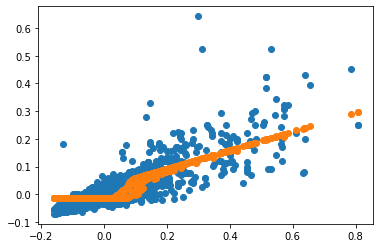

In [110]:
plt.scatter(X_test['scaled_x1'], y_test, label='test data')
plt.scatter(X_test['scaled_x1'], yhat, label='prediction')